In [1]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
!pip install cython pyyaml==5.1

Looking in indexes: https://download.pytorch.org/whl/cu121
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-o04oyme2
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-o04oyme2
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Created wheel for pycocotools: filename=pycocotools-2.0-cp310-cp310-linux_x86_64.whl size=109308 sha256=d65a5dc54bf6c29c65b1f4d74c749efa6bb30a7ad3c8d15487d3391ce0be7151
  Stored in directory: /tmp/pip-ephem-wheel-cache-wnmg4vcv/wheels/39/61/b4/480fbddb4d3d6bc34083e7397bc6f5d1381f79acc68e9f3511
Successfully built pycocotools
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 5.3 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [34 li

In [2]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-cfq8obv7
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-cfq8obv7
  Resolved https://github.com/facebookresearch/detectron2.git to commit c69939aa85460e8135f40bce908a6cddaa73065f
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.8/427.8 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24

In [3]:
import torch
import detectron2
from detectron2.utils.logger import setup_logger
import os
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
from detectron2.data import Metadata
from detectron2 import model_zoo


cfg = get_cfg()

In [4]:
cat_names = [
    'short sleeved shirt', 'long sleeved shirt', 'short sleeved outwear', 'long sleeved outwear',
    'vest', 'sling', 'shorts', 'trousers', 'skirt', 'short sleeved dress',
    'long sleeved_dress', 'vest dress', 'sling dress'
]

custom_metadata = Metadata()
custom_metadata.set(thing_classes=cat_names)

namespace(thing_classes=['short sleeved shirt',
                         'long sleeved shirt',
                         'short sleeved outwear',
                         'long sleeved outwear',
                         'vest',
                         'sling',
                         'shorts',
                         'trousers',
                         'skirt',
                         'short sleeved dress',
                         'long sleeved_dress',
                         'vest dress',
                         'sling dress'])

## cv-mask-rcnn-r-50-fpn-3x

In [5]:
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = os.path.join('/kaggle/input/mask-rcnn-models/mask-rcnn/cv-mask-rcnn-r-50-fpn-3x-171124', "cv-mask-rcnn-r-50-fpn-3x-171124.pth")

cfg.MODEL.ROI_HEADS.NUM_CLASSES = 13
cfg.INPUT.FORMAT = "RGB"
cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu" 

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.55

predictor = DefaultPredictor(cfg)

/opt/conda/lib/python3.10/site-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))

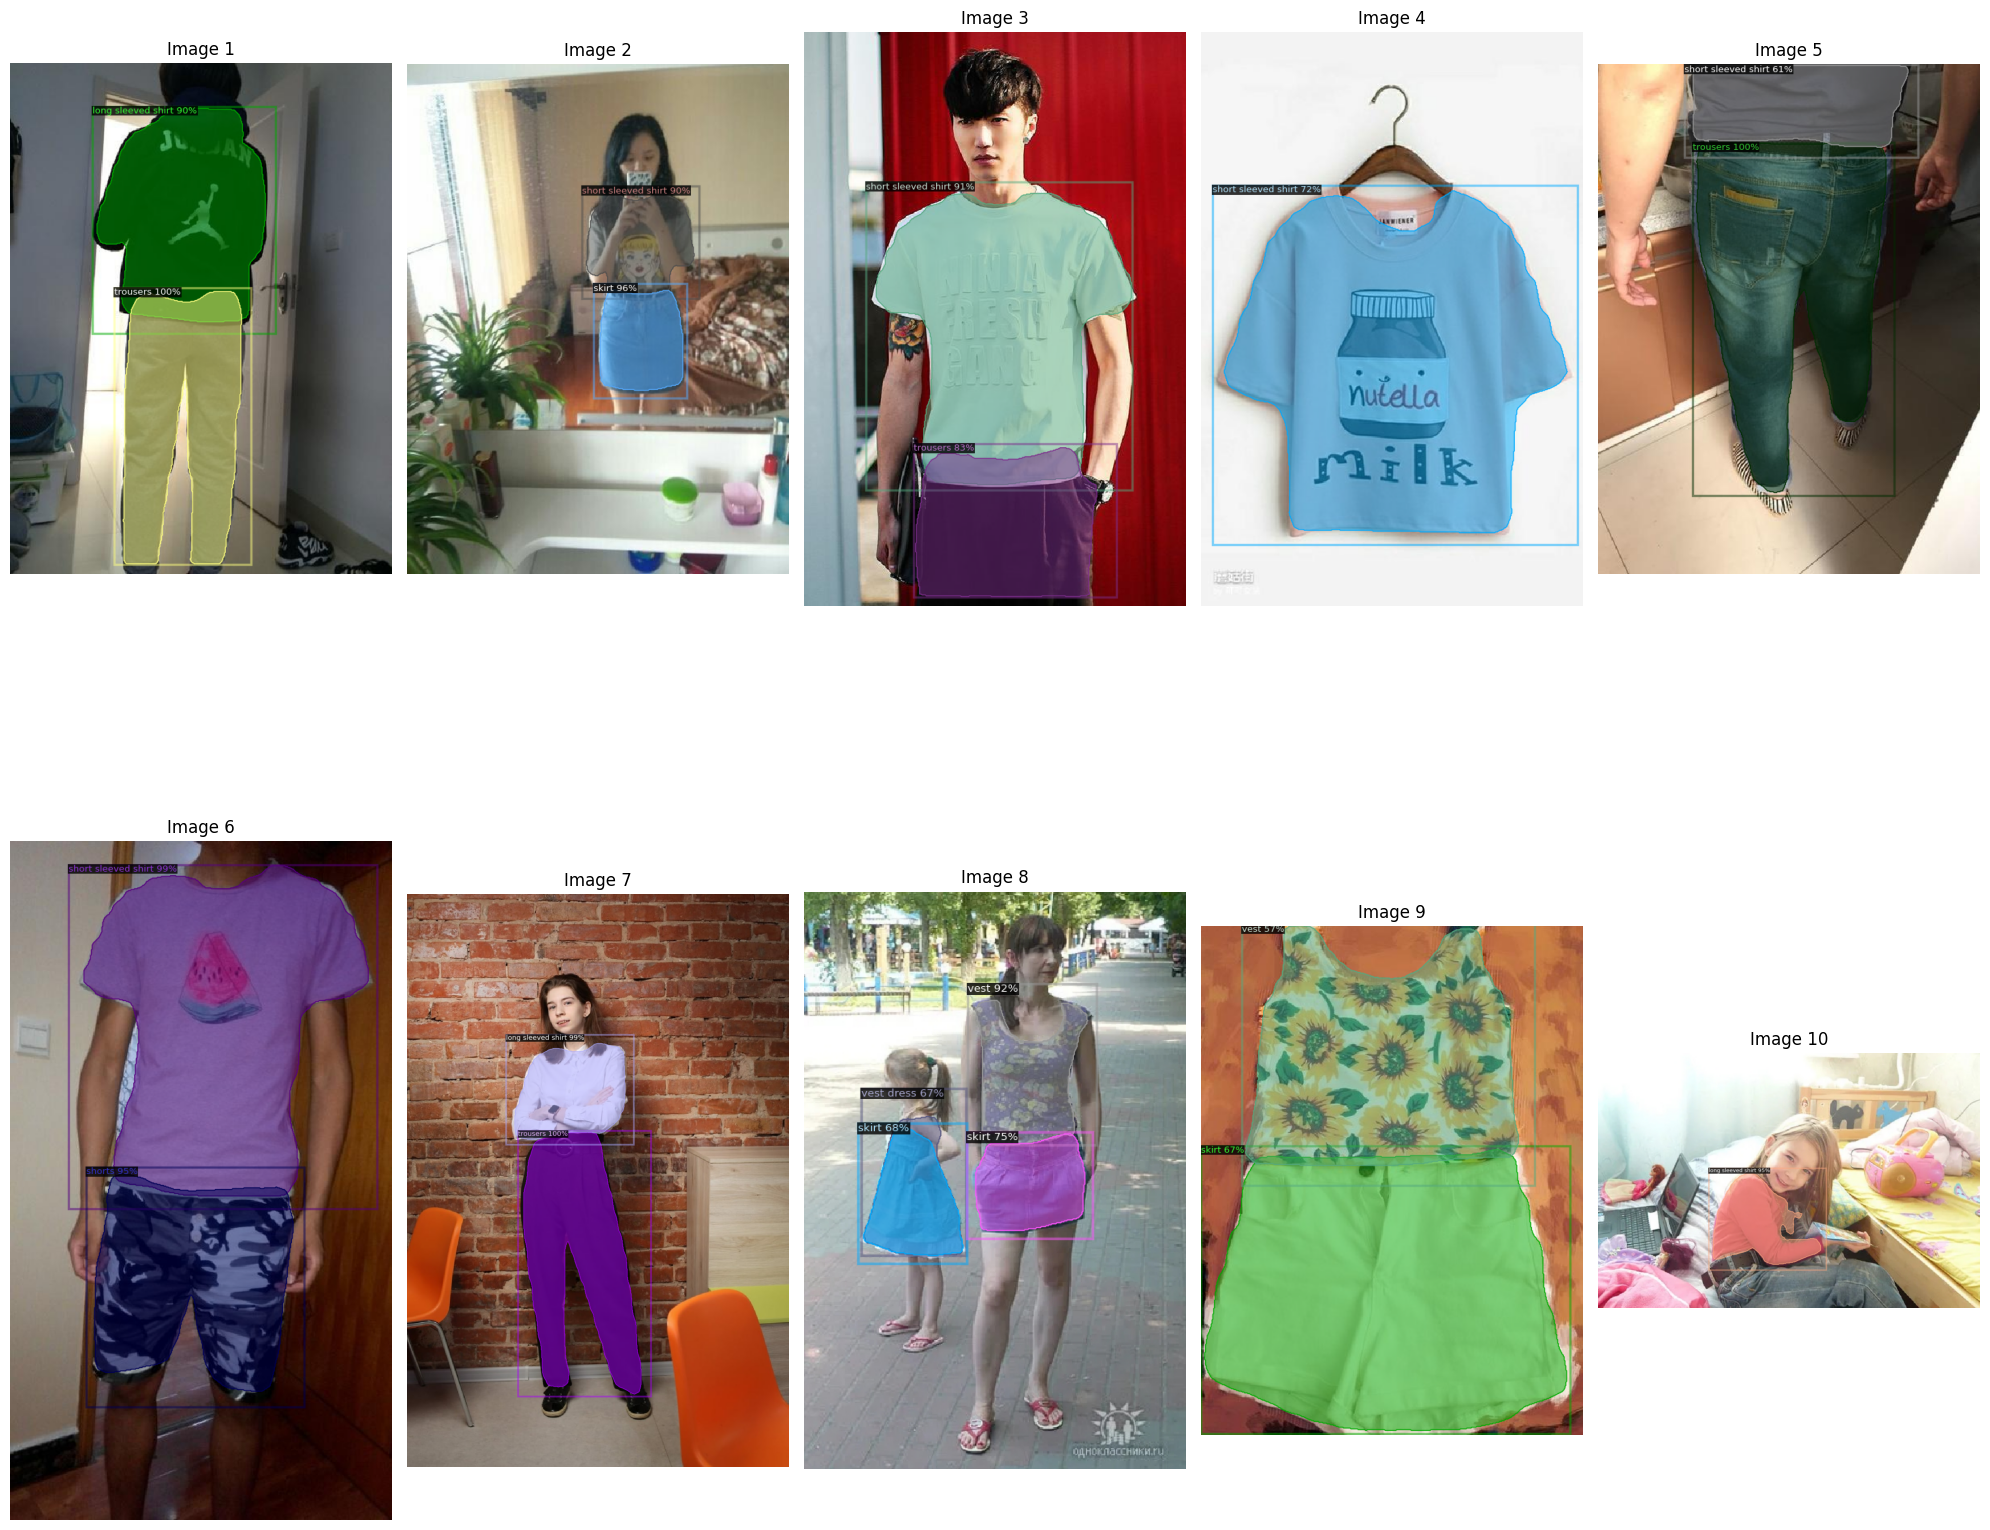

In [9]:
import cv2
import random
import matplotlib.pyplot as plt
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog


image_dir = "/kaggle/input/mask-rcnn-models/val/val"
image_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith(".jpg") or f.endswith(".jpeg") or f != '002935.jpg']
images = random.sample(image_files, 10)
plt.figure(figsize=(20, 20))
for i in range(10):
    
    im = cv2.cvtColor(cv2.imread(images[i]), cv2.COLOR_BGR2RGB)
    
    outputs = predictor(im)
    
    v = Visualizer(im, metadata=custom_metadata, scale=1.2)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    
    plt.subplot(2, 5, i + 1) 
    plt.imshow(v.get_image())
    plt.axis("off")
    plt.title(f"Image {i + 1}")

plt.tight_layout()
plt.savefig("mask-rcnn-r-50-fpn-3x-171124.png", dpi=300, bbox_inches='tight')

plt.show()